# WeatherPy
----

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

while len(cities) < 500:
    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval\n-----------------------------\n")

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

responses = []

i = 0
for city in cities:
    i = i + 1
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing Record {i} | {city}")
        responses.append(response)
    else:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------

Processing Record 1 | cidreira
Processing Record 2 | riyadh
Processing Record 3 | belaya gora
Processing Record 4 | vaini
Processing Record 5 | karasjok
Processing Record 6 | saint george
Processing Record 7 | norman wells
Processing Record 8 | thompson
Processing Record 9 | kodiak
Processing Record 10 | businga
Processing Record 11 | port blair
Processing Record 12 | rikitea
Processing Record 13 | saint-philippe
Processing Record 14 | victoria point
Processing Record 15 | hobart
Processing Record 16 | saskylakh
City not found. Skipping...
City not found. Skipping...
Processing Record 19 | carnarvon
Processing Record 20 | provideniya
Processing Record 21 | el alto
Processing Record 22 | dingle
Processing Record 23 | castro
Processing Record 24 | port alfred
Processing Record 25 | nanortalik
Processing Record 26 | mataura
Processing Record 27 | georgetown
Processing Record 28 | east london
Processing Record 29 | major isidoro
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

for resp in responses:
    city_list.append(resp['name'])
    cloudiness_list.append(resp['clouds']['all'])
    country_list.append(resp['sys']['country'])
    date_list.append(resp['dt'])
    humidity_list.append(resp['main']['humidity'])
    lat_list.append(resp['coord']['lat'])
    lng_list.append(resp['coord']['lon'])
    max_temp_list.append(resp['main']['temp_max'])
    wind_speed_list.append(resp['wind']['speed'])
    
city_data_dict = {
    'City': city_list,
    'Cloudiness': cloudiness_list,
    'Country': country_list,
    'Date': date_list,
    'Humidity': humidity_list,
    'Lat': lat_list,
    'Lng': lng_list,
    'Max Temp': max_temp_list,
    'Wind Speed': wind_speed_list
}

city_data_df = pd.DataFrame(city_data_dict)

city_data_df.to_csv(output_data_file, index=False)

city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cidreira,82,BR,1578153603,80,-30.17,-50.22,72.64,17.16
1,Riyadh,40,SA,1578153603,43,24.63,46.72,73.40,11.41
2,Belaya Gora,100,RU,1578153603,97,68.54,146.19,-18.42,1.63
3,Vaini,0,IN,1578153603,57,15.34,74.49,75.20,3.36
4,Karasjok,75,NO,1578153604,92,69.47,25.52,21.20,28.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

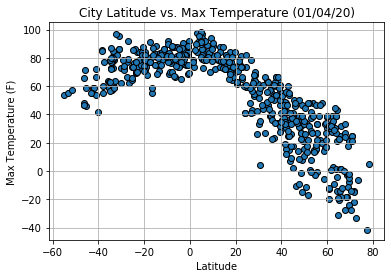

In [10]:
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature (01/04/20)')
plt.savefig('output_data/CityLatitudeVsMaxTemp.png')

In [11]:
# This plot shows that the temperature is typically higher in the Southern Hemisphere, particularly as we approach just below the equator. This makes sense since it is Summer in the Southern Hemisphere and Winter in the Northern Hemisphere in January.

#### Latitude vs. Humidity Plot

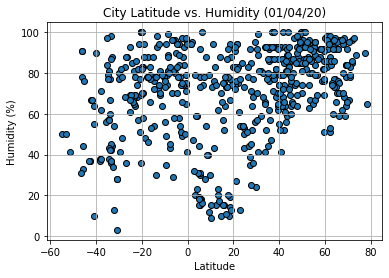

In [12]:
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (01/04/20)')
plt.savefig('output_data/CityLatitudeVsHumidity.png')

In [13]:
# This shows that the humidity is dropping slightly lower in the Southern Hemisphere right now.

#### Latitude vs. Cloudiness Plot

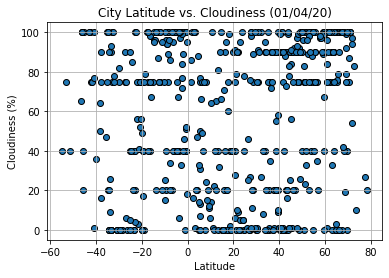

In [14]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (01/04/20)')
plt.savefig('output_data/CityLatitudeVsCloudiness.png')

In [15]:
# This shows that the cloudiness is not affected much by the Earth's latitude.

#### Latitude vs. Wind Speed Plot

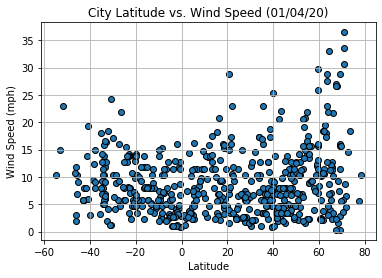

In [16]:
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed (01/04/20)')
plt.savefig('output_data/CityLatitudeVsWindSpeed.png')

In [17]:
# This shows that the wind speed is typically higher near the lowest and highest latitudes (further away from the equator).

## Linear Regression

In [87]:
def linear_reg_plot(df, y_column_name, y_label, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    
    print(f"The r-squared is: {rvalue}")
    
    plt.show()

In [88]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] > 0, :]
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.866143359193459


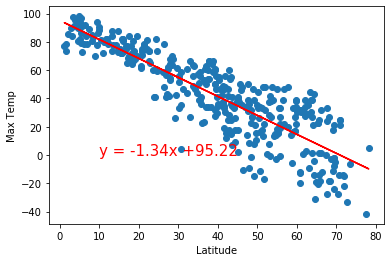

In [89]:
linear_reg_plot(northern_hemisphere_df, 'Max Temp', 'Max Temp', (10,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5689583658219889


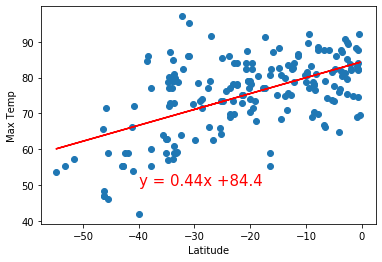

In [90]:
linear_reg_plot(southern_hemisphere_df, 'Max Temp', 'Max Temp', (-40,50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.5012405169696248


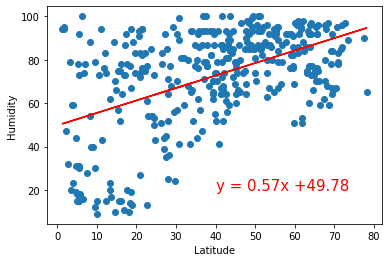

In [91]:
linear_reg_plot(northern_hemisphere_df, 'Humidity', 'Humidity', (40,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3623735398696904


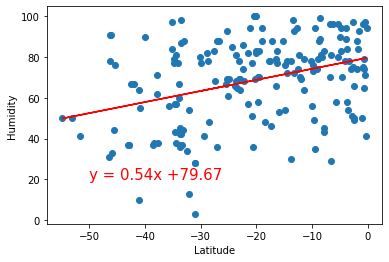

In [92]:
linear_reg_plot(southern_hemisphere_df, 'Humidity', 'Humidity', (-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.32437958218377994


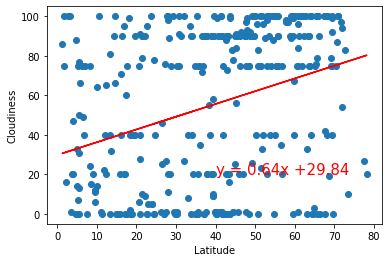

In [93]:
linear_reg_plot(northern_hemisphere_df, 'Cloudiness', 'Cloudiness', (40,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19135039224835002


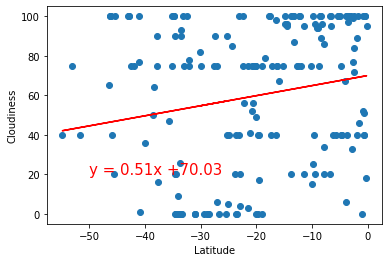

In [94]:
linear_reg_plot(southern_hemisphere_df, 'Cloudiness', 'Cloudiness', (-50,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2214515320852304


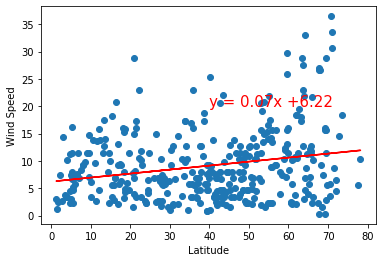

In [95]:
linear_reg_plot(northern_hemisphere_df, 'Wind Speed', 'Wind Speed', (40,20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.33232587569513006


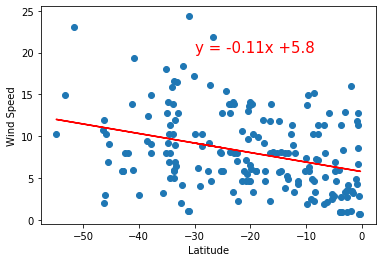

In [96]:
linear_reg_plot(southern_hemisphere_df, 'Wind Speed', 'Wind Speed', (-30,20))